In [8]:
import pandas as pd

df = pd.read_csv(r'C:\Users\Lenovo\Documents\full_data.csv')
df


,date,location,new_cases,new_deaths,total_cases,total_deaths
0,31-12-2019,Afghanistan,0,0,0,0
1,01-01-2020,Afghanistan,0,0,0,0
2,02-01-2020,Afghanistan,0,0,0,0
3,03-01-2020,Afghanistan,0,0,0,0
4,04-01-2020,Afghanistan,0,0,0,0
...,...,...,...,...,...,...
8997,01-04-2020,Zimbabwe,1,0,8,1
8998,02-04-2020,Zimbabwe,0,0,8,1
8999,03-04-2020,Zimbabwe,0,0,8,1
9000,04-04-2020,Zimbabwe,1,0,9,1


             total_cases  new_cases
total_cases                        
(0, 10]         3.750777   0.748705
(10, 20]       14.881356   2.457627
(20, 30]       25.106452   4.309677
(30, 40]       35.348624   5.288991
(40, 50]       45.329268   7.469512


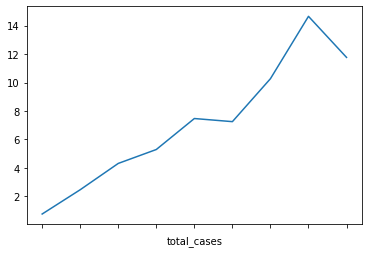

In [9]:
%matplotlib inline
import numpy as np
df1=df[['total_cases','new_cases']]
bins =  np.arange(0,100,10)
groups = df1.groupby(pd.cut(df1['total_cases'],bins)).mean()
print(groups.head())
groups['new_cases'].plot.line()

In [17]:
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

X = df[['total_cases','new_deaths','new_cases']]
y = df['total_deaths']

X[['total_cases','new_deaths','new_cases']] = scale.fit_transform(X[['total_cases','new_deaths','new_cases']])

print (X)

est = sm.OLS(y, X).fit()

est.summary()

E:\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
E:\anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


      total_cases  new_deaths  new_cases
0       -0.100413   -0.083529  -0.092532
1       -0.100413   -0.083529  -0.092532
2       -0.100413   -0.083529  -0.092532
3       -0.100413   -0.083529  -0.092532
4       -0.100413   -0.083529  -0.092532
...           ...         ...        ...
8997    -0.100169   -0.083529  -0.092178
8998    -0.100169   -0.083529  -0.092532
8999    -0.100169   -0.083529  -0.092532
9000    -0.100138   -0.083529  -0.092178
9001    -0.100138   -0.083529  -0.092532

[9002 rows x 3 columns]


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:           total_deaths   R-squared (uncentered):                   0.973
Model:                            OLS   Adj. R-squared (uncentered):              0.973
Method:                 Least Squares   F-statistic:                          1.063e+05
Date:                Mon, 06 Apr 2020   Prob (F-statistic):                        0.00
Time:                        14:31:59   Log-Likelihood:                         -63294.
No. Observations:                9002   AIC:                                  1.266e+05
Df Residuals:                    8999   BIC:                                  1.266e+05
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
total_cases  1274.2646     11.574    110.095      0.000    1251.576    1296.953
new_deaths   1137.9389     10.730    106.053      0.000    1116.906    1158.972
new_cases    -795.4036     11.138    -71.413      0.000    -817.237    -773.570
==============================================================================
Omnibus:                    10632.019   Durbin-Watson:                   0.642
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         77683310.848
Skew:                           4.855   Prob(JB):                         0.00
Kurtosis:                     457.989   Cond. No.                         8.40
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
y.groupby(df.total_cases).mean()

total_cases
0              0.000000
1              0.010239
2              0.056738
3              0.182156
4              0.118110
               ...     
851308     41885.000000
928436     46883.000000
1000249    51514.000000
1082054    58141.000000
1174652    64400.000000
Name: total_deaths, Length: 1485, dtype: float64

In [19]:
scaled = scale.transform([[4374,300,562]])
print(scaled)
predicted = est.predict(scaled[0])
print(predicted)

[[0.03320019 1.66785313 0.10673217]]
[1855.325659]
